# test page for lstm method.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import random
import shutil
import tensorflow.contrib.learn as tflearn
import tensorflow.contrib.layers as tflayers
from tensorflow.contrib.learn.python.learn import learn_runner
import tensorflow.contrib.metrics as metrics
import tensorflow.contrib.rnn as rnn
import keras.backend.tensorflow_backend as KTF
from lstm_data_util import generate_toy_data_for_lstm
from rnn_model import rnn_model, single_rnn_model

%load_ext autoreload
%autoreload 2

/home/cvdev/tf/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

gpu_config = tf.ConfigProto()
gpu_config.gpu_options.allow_growth = True
session = tf.Session(config=gpu_config)
KTF.set_session(session)

### steps
1. generate toy data for prediction
2. change f_horizon value to see results

In [3]:
def moving_f_horizons(f_horizons):
    '''
    Check the relationship between f_horizon and the behavior.
    Parameters must match.
    '''
    y_tests = []
    y_preds = []
    Losses = []
    for f_horizon in f_horizons:    
        X_batches, y_batches, X_test, y_test = generate_toy_data_for_lstm(num_periods = 120, f_horizon = f_horizon, samples = 10009)
        print(X_test.shape)
        print("f_horizon is %d." %f_horizon)
        losses, y_pred = single_rnn_model(X_batches, y_batches, X_test, y_test, cell="BasicRNNCell", 
                  learning_rate=0.001, epochs=500, print_every=100, 
                  inputs=1, outputs=1, hidden=100, num_periods=120)
        y_tests.append(y_test)
        y_preds.append(y_pred)
        Losses.append(losses)
        
    return Losses, y_tests, y_preds

length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 1.
0   MSE: 1571404.8
100   MSE: 6679.5693
200   MSE: 3183.434
300   MSE: 910.97974
400   MSE: 141.72794
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 2.
0   MSE: 2116853.0
100   MSE: 11589.892
200   MSE: 6936.876
300   MSE: 4021.7961
400   MSE: 1997.2969
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 3.
0   MSE: 2438841.0
100   MSE: 18235.3
200   MSE: 12320.234
300   MSE: 8894.42
400   MSE: 5752.4883
length of training data x :  (9960,)
length of training data y :  (9960,)
training data x shape :  (83, 120, 1)
(1, 120, 1)
f_horizon is 4.
0   MSE: 1402775.4
100   MSE: 7732.648
200   MSE: 3987.5107
300   MSE: 1616.229
400   MSE: 484.7872
length of training data x :  (9960,)


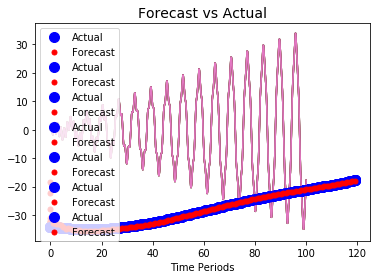

In [4]:
f_horizons = [1,2,3,4,5,8,10]
Losses, y_tests, y_preds = moving_f_horizons(f_horizons)

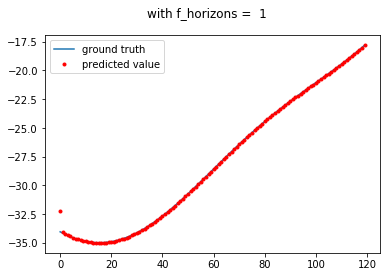

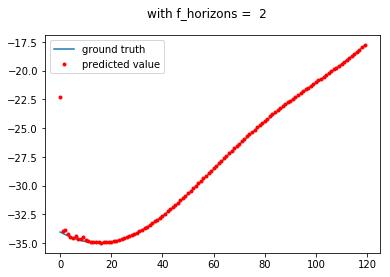

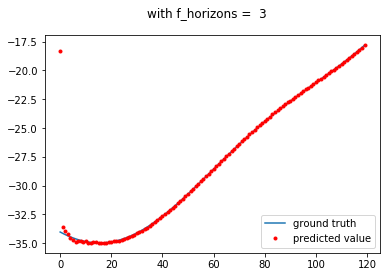

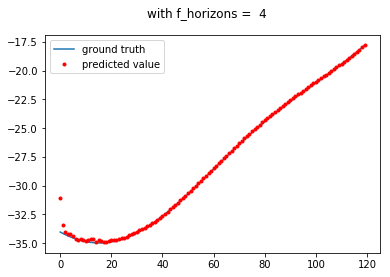

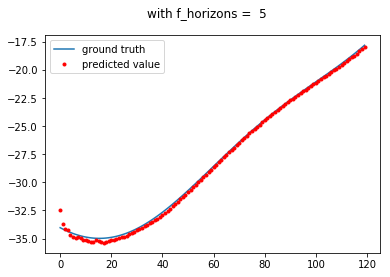

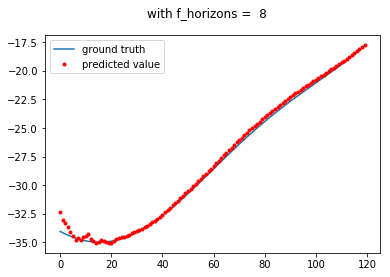

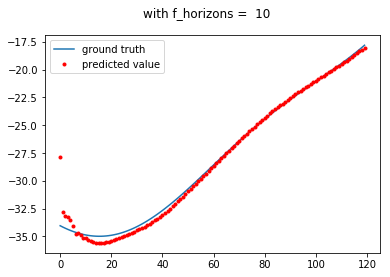

In [5]:
for i in range(len(Losses)):
    
    y_test = np.squeeze(y_tests[i])
    y_pred = np.squeeze(y_preds[i])
    
    fig, ax=plt.subplots(1, 1)
    
    x = range(len(y_test))
    
    f_horizon = f_horizons[i]
    fig.suptitle('with f_horizons =  %i' %(f_horizon));
      
    # p = plt.subplot(num)
    ax.plot(x, y_test, label="ground truth")
    ax.plot(x, y_pred, 'r.', label="predicted value")
    ax.legend()

# Results
- f_horizon 可以取不同的值，随着该值越来越大，也就是预测越来越远的未来，模型的表现就越差

# ChangeLog
- 20180414 v0